# 📦 Importing Required Libraries (Hierarchical Clustering)

In this notebook, we perform **Hierarchical (Agglomerative) Clustering** for customer segmentation.

We use:
- **Pandas / NumPy** for data handling and numerical operations
- **Matplotlib** for visualization
- **SciPy** for building and visualizing dendrograms
- **Scikit-learn** for implementing Agglomerative Clustering


In [2]:
# Import Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# SciPy tools for hierarchical clustering and dendrogram visualization
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

# Scikit-learn implementation of Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

# Optional / Keep only if used later
from scipy import ndimage
from sklearn import manifold, datasets
from sklearn.datasets import make_blobs


# 📂 Data Loading and Preprocessing

In this section, we:

1. Load the dataset
2. Remove unnecessary columns (CustomerID, Gender)
3. Ensure all values are numeric
4. Handle missing values
5. Select relevant features for clustering

For Hierarchical Clustering, we focus on:

- Age
- Annual Income (k$)
- Spending Score (1-100)


In [3]:
# Load Dataset

df = pd.read_csv("../../data/Customer.csv")

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Remove Non-Numeric / Irrelevant Columns

df = df.drop(columns=["CustomerID", "Gender"])

df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [5]:
# Ensure all columns are numeric
df = df.apply(pd.to_numeric, errors="coerce")

df.dtypes

Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

In [6]:
# Check shape before dropping NaNs
print("Shape before dropping NaNs:", df.shape)

# Drop missing values
df = df.dropna()

# Reset index properly
df = df.reset_index(drop=True)

print("Shape after dropping NaNs:", df.shape)

df.head()

Shape before dropping NaNs: (200, 3)
Shape after dropping NaNs: (200, 3)


,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [7]:
# Feature Selection
featureset = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

featureset.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


# 📏 Feature Scaling (Min-Max Normalization)

Hierarchical clustering is distance-based,  
so feature scaling is necessary to ensure that all features contribute equally.

We apply **MinMaxScaler**, which transforms features into the range:

\[
0 \rightarrow 1
\]

This preserves relative relationships while normalizing scale differences.

In [8]:
# Apply Min-Max Scaling

from sklearn.preprocessing import MinMaxScaler

# Convert selected features to NumPy array
X = featureset.values

# Initialize scaler
scaler = MinMaxScaler()

# Fit and transform
X_scaled = scaler.fit_transform(X)

# Display scaled data
X_scaled[:5]

array([[0.01923077, 0.        , 0.3877551 ],
       [0.05769231, 0.        , 0.81632653],
       [0.03846154, 0.00819672, 0.05102041],
       [0.09615385, 0.00819672, 0.7755102 ],
       [0.25      , 0.01639344, 0.39795918]])

# 🌳 Distance Matrix & Hierarchical Linkage

To build a hierarchical clustering tree (dendrogram), we compute pairwise distances between samples  
and then apply a linkage method to iteratively merge clusters.

We use:
- **Euclidean distance** as the distance metric
- **Complete linkage** (maximum distance between cluster elements)

Next, we will visualize the hierarchy using a dendrogram.


In [9]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage

# Pairwise distances (condensed form)
dist_condensed = pdist(X_scaled, metric="euclidean")

# Optional: square distance matrix for inspection/visualization
D = squareform(dist_condensed)

# Hierarchical linkage
Z = linkage(dist_condensed, method="complete")

Z[:5]

array([[1.29000000e+02, 1.31000000e+02, 1.92307692e-02, 2.00000000e+00],
       [6.50000000e+01, 6.80000000e+01, 1.92307692e-02, 2.00000000e+00],
       [1.06000000e+02, 1.09000000e+02, 2.04081633e-02, 2.00000000e+00],
       [3.00000000e+00, 5.00000000e+00, 2.32622442e-02, 2.00000000e+00],
       [1.60000000e+01, 2.00000000e+01, 2.45901639e-02, 2.00000000e+00]])

# 📉 Dendrogram Visualization

A dendrogram shows how clusters are merged at different distance thresholds.  
By inspecting the dendrogram, we can choose an appropriate number of clusters.

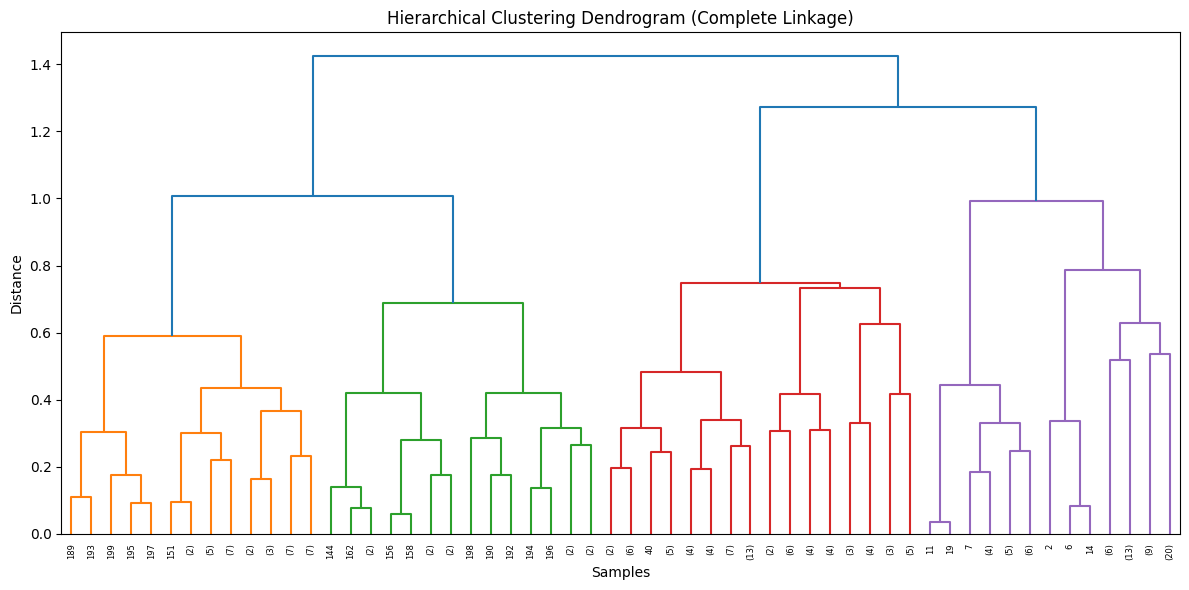

In [10]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram (Complete Linkage)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

# 🚀 Agglomerative Clustering Model

Based on the dendrogram analysis,  
we select the number of clusters (n_clusters = 5).

We apply **Agglomerative Clustering** using:

- Linkage method: Complete
- Distance metric: Euclidean

The model assigns each customer to a hierarchical cluster.


In [11]:
# Apply Agglomerative Clustering

from sklearn.cluster import AgglomerativeClustering

agglom = AgglomerativeClustering(
    n_clusters=5,
    linkage="complete"
)

# Fit on scaled feature matrix
labels_hc = agglom.fit_predict(X_scaled)

labels_hc

array([0, 4, 0, 4, 0, 4, 0, 4, 2, 4, 2, 4, 2, 4, 0, 4, 0, 4, 2, 4, 0, 4,
       2, 4, 2, 4, 2, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       0, 3, 1, 3, 2, 3, 1, 3, 2, 3, 0, 3, 1, 3, 2, 3, 1, 3, 2, 3, 2, 3,
       2, 3, 1, 3, 1, 3, 2, 3, 1, 3, 2, 3, 2, 3, 1, 3, 1, 3, 1, 3, 2, 3,
       2, 3, 2, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int64)

In [13]:
df["Cluster_Hierarchical"] = labels_hc

df.head()

,Age,Annual Income (k$),Spending Score (1-100),Cluster_Hierarchical
0,19,15,39,0
1,21,15,81,4
2,20,16,6,0
3,23,16,77,4
4,31,17,40,0


In [14]:
# Cluster profiling
cluster_summary_hc = df.groupby("Cluster_Hierarchical").mean(numeric_only=True)

cluster_summary_hc

,Age,Annual Income (k$),Spending Score (1-100)
Cluster_Hierarchical,,,
0,27.960784,49.411765,47.411765
1,34.526316,94.526316,15.894737
2,54.205479,54.643836,36.232877
3,32.692308,86.538462,82.128205
4,25.333333,24.000000,81.777778


In [15]:
agglom = AgglomerativeClustering(
    n_clusters=5,
    linkage="complete",
    metric="precomputed"
)

labels_hc = agglom.fit_predict(D)

# 📏 Model Evaluation (Silhouette Score)

Although Hierarchical Clustering does not directly optimize a cost function like K-Means,  
we can still evaluate cluster quality using **Silhouette Score**.

- Range: **-1 to 1**
- Higher is better
- Measures separation between clusters and cohesion within clusters

In [16]:
from sklearn.metrics import silhouette_score

sil_hc = silhouette_score(X_scaled, df["Cluster_Hierarchical"])
print("Silhouette Score (Hierarchical - Complete Linkage):", sil_hc)

Silhouette Score (Hierarchical - Complete Linkage): 0.36141375230238765


# 📊 Cluster Profiling

To interpret each cluster, we compute:

- Mean values of features per cluster
- Number of customers in each cluster

This helps transform clustering results into actionable customer segments.


In [17]:
cluster_counts_hc = df["Cluster_Hierarchical"].value_counts().sort_index()
cluster_profile_hc = df.groupby("Cluster_Hierarchical").mean(numeric_only=True)

print("Cluster Counts:\n", cluster_counts_hc)
cluster_profile_hc

Cluster Counts:
 Cluster_Hierarchical
0    51
1    19
2    73
3    39
4    18
Name: count, dtype: int64


,Age,Annual Income (k$),Spending Score (1-100)
Cluster_Hierarchical,,,
0,27.960784,49.411765,47.411765
1,34.526316,94.526316,15.894737
2,54.205479,54.643836,36.232877
3,32.692308,86.538462,82.128205
4,25.333333,24.000000,81.777778


# 🎨 2D Visualization (Annual Income vs Spending Score)

A common visualization for the Mall Customers dataset is plotting:

- **Annual Income (k$)**
- **Spending Score (1-100)**

Color represents cluster assignment.
This provides an intuitive view of customer groups based on purchasing power and behavior.

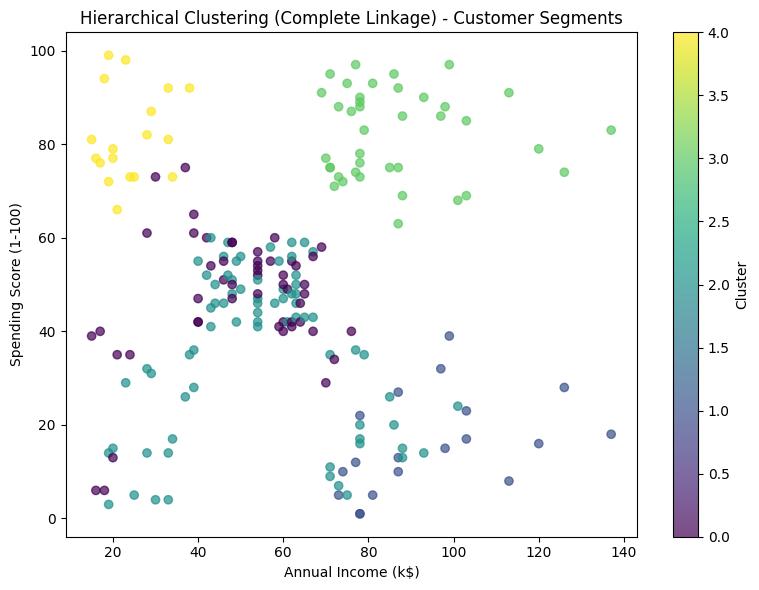

In [19]:
plt.figure(figsize=(8, 6))

scatter = plt.scatter(
    df["Annual Income (k$)"],
    df["Spending Score (1-100)"],
    c=df["Cluster_Hierarchical"],
    alpha=0.7
)

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Hierarchical Clustering (Complete Linkage) - Customer Segments")
plt.colorbar(scatter, label="Cluster")
plt.tight_layout()

plt.show()